# Allen Institute
## 05-4_visualization
---
### Before you start
- run codes in `05-3_m1_10x_annot.Rmd`

In [33]:
import glob
from typing import Dict, List, NamedTuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pyreadr as pr
import pandas as pd
import seaborn as sns
from umap import UMAP

In [23]:
class Config(NamedTuple):
    data: pd.core.frame.DataFrame = pd.read_pickle("../../data/m1_10x_viz/orig_markers+_log.pkl")
    labels: List[pd.core.frame.DataFrame] = [
        pd.read_csv(
            v, 
            index_col=0
        ).sort_values("cluster_id") for v in glob.glob("../../data/m1_10x_annot/*_clusters.csv")
    ]
    save_dir: str = "../../out/m1_10x/05_seurat_annot"
    fig_kwarg: Dict[str, Union[str, int, float]] = {
        'facecolor': 'white',
        'dpi': 300,
        'bbox_inches': 'tight',
        'pad_inches': 0.05
    }
    save_file: bool = False
    
conf = Config(save_file=True)

In [27]:
sample_id = "m1_10x"

In [36]:
data = pd.DataFrame(
    UMAP(n_neighbors=15, min_dist=0.0, random_state=0).fit_transform(conf.data),
    index=conf.data.index,
    columns=[f"UMAP_{i+1}" for i in range(2)]
)

In [42]:
l_center = [data.assign(label=label).groupby("label").median() for label in conf.labels]

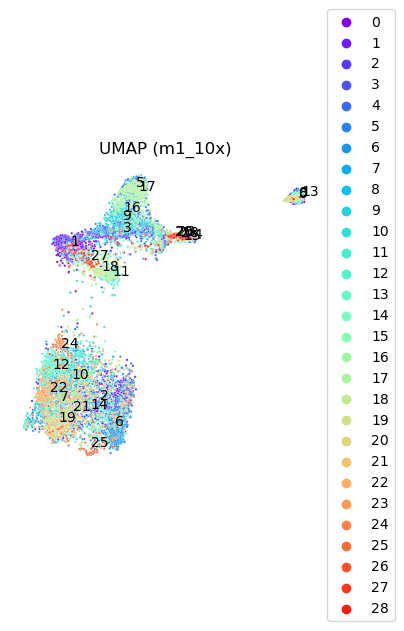

In [47]:
for label, center in zip(conf.labels, l_center):

    fig, ax = plt.subplots(figsize=(4, 4))

    sns.scatterplot(
        data=data.loc[label.index, :], x="UMAP_1", y="UMAP_2", hue=label.cluster_id,
        s=3, 
        palette=[plt.cm.rainbow(i/len(label.cluster_id.unique())) for i in range(len(label.cluster_id.unique()))]
    )

    for i, v in enumerate(center.index):
        ax.annotate(int(v), center.iloc[i, :], center.iloc[i, :])

    ax.set(title=f"UMAP ({sample_id})")
    ax.legend(bbox_to_anchor=(1, .5), loc="center left");
    ax.axis("off");
    
    if conf.save_file:
        plt.savefig(f"{conf.save_dir}/{sample_id}_umap.png", **conf.fig_kwarg)